# What is Thinning

Thinning is a morphological operation that is used to remove selected foreground pixels from binary images. It can be used for several applications, but is particularly useful for skeletonization.
Thinning is normally only applied to binary images, and produces another binary image as output.

In this notebook I will discuss about an example of thinned binary image using `openCV` library, an example of thinned binary image using `Scikit-image` library and then an implementation of Zhang-Suen Thinning Alghoritm, with some examples where the format of the starting image must be .bmp. 

The language used is Pyhton. The image processing is made with `Matplotlib`, `Scikit-image` and `openCV`. 

In [27]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.morphology import thin
from skimage import data
from skimage.util import invert
from skimage.filters import threshold_otsu

## Thinning with openCV

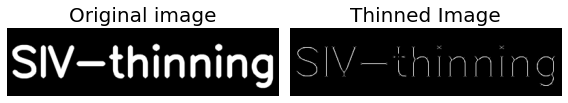

In [28]:
# Create an image with text on it
img = np.zeros((100,400),dtype='uint8')
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'SIV-thinning',(5,70), font, 2,(255),5,cv2.LINE_AA)
img1 = img.copy()
 
# Structuring Element
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# Create an empty output image to hold values
thinned_image = np.zeros(img.shape,dtype='uint8')
 
# Loop until erosion leads to an empty set
while (cv2.countNonZero(img1)!=0):
    # Erosion
    erode = cv2.erode(img1,kernel)
    # Opening on eroded image
    opening = cv2.morphologyEx(erode,cv2.MORPH_OPEN,kernel)
    # Subtract these two
    subset = erode - opening
    # Union of all previous sets
    thinned_image = cv2.bitwise_or(subset,thinned_image)
    # Set the eroded image for next iteration
    img1 = erode.copy()
    

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('Original image', fontsize=20)

ax[1].imshow(thinned_image, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Thinned Image', fontsize=20)

fig.tight_layout()    
#cv2.imshow('original',img)
#cv2.imshow('thinned',thin)
#cv2.waitKey(0)

## Thinning with Scikit-image

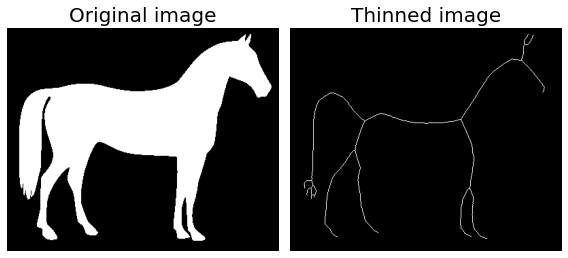

In [29]:
# Invert the horse image
image = invert(data.horse())

# perform thinning
thinned = thin(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('Original image', fontsize=20)

ax[1].imshow(thinned, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Thinned image', fontsize=20)

fig.tight_layout()

# Zhang-Suen Thinning Algorithm
In this algorithm, developed by T. Y. Zhang and C. Y. Suen in 1984, we have s a parallel method consisting of two sub-iterations. The first iteration is to delete the southeast boundary point and the northwest vertex, and the other iteration is to delete the northwest boundary point and the southeast vertex. The rule in Zhang-Suen's algorithm is that there are two sub-iterations within the iteration. The following is the presence of sub-iterations in the Zhang-Suen method:
1. Sub-iteration 1: 
- 2 <= N(P1) <= 6
- S(P1) = 1
- P2 * P4 * P6 == 0 
- P4 * P6 * P8 == 0
2. Sub-iteration 2: 
- 2 <= N(P1) <= 6
- S(P1) = 1
- P2 * P4 * P8 == 0 
- P2 * P6 * P8 == 0

Remember that given an element of the matrix `M[i][j]` and calling this $P_1$, the neighbours it are: 

|                    |                  |                    |
| ------------------ | ---------------- | ------------------ |
| $P_9$ `[i-1][j-1]` | $P_2$ `[i-1][j]` | $P_3$ `[i-1][j+1]` |
| $P_8$ `[i][j-1]`   | $P_1$ `[i][j]`   | $P_4$ `[i][j+1]`   |
| $P_7$ `[i+1][j-1]` | $P_6$ `[i+1][j]` | $P_5$ `[i+1][j+1]` |

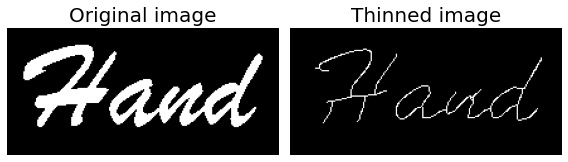

In [38]:
# load image data: the image is gray (rgb images need pre-conversion)
real_image = io.imread('*/data/test2.bmp')     

# We use Otsu's method to convert gray images to binary images, setting object region as 1 and background region as 0
# the algorithm returns a single intensity threshold that separate pixels into two classes, foreground and background. 
Otsu_Threshold = threshold_otsu(real_image)   
image_used = real_image < Otsu_Threshold

def neighbours(x,y,image):
    # Return 8-neighbours of P1 in a clockwise order 
    img = image
    x_1, y_1, x1, y1 = x-1, y-1, x+1, y+1
    return [img[x_1][y], img[x_1][y1], img[x][y1], img[x1][y1], img[x1][y], img[x1][y_1], img[x][y_1], img[x_1][y_1]]    # P2,P3,P4,P5,P6,P7,P8,P9

def transitions(neighbours):
    # n is the number of 0,1 patterns (transitions from 0 to 1) in the ordered sequence
    n = neighbours + neighbours[0:1]      # P2, P3, P4, P5, P6, P7, P8, P9, P2
    return sum((n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:]))  # (P2,P3), (P3,P4), (P4,P5), (P5,P6), (P6,P7), (P7,P8), (P8,P9), (P9,P2)

def Zhang_Suen_Thinning_Algorithm(image):
    image_Thinned = image.copy()  # Necessary to protect the original image
    c1 = c2 = 1        #  the points to be removed (set as 0)
    while c1 or c2:   #  iterate until no more changes occur in the image
        # Sub-iteration 1
        c1 = []
        rows, columns = image_Thinned.shape               # x:rows and y:columns
        for x in range(1, rows - 1):                     # The number of rows
            for y in range(1, columns - 1):            # The number of columns
                P2, P3, P4, P5, P6, P7, P8, P9 = n = neighbours(x, y, image_Thinned)
                if (image_Thinned[x][y] == 1     and    # P1 in the object regions 
                    2 <= sum(n) <= 6   and    # Condition 1: 2<= N(P1) <= 6
                    transitions(n) == 1 and    # Condition 2: S(P1) = 1  
                    P2 * P4 * P6 == 0  and    # Condition 3   
                    P4 * P6 * P8 == 0):         # Condition 4
                    c1.append((x,y))
        for x, y in c1: 
            image_Thinned[x][y] = 0
        # Sub-iteration 2
        c2 = []
        for x in range(1, rows - 1):
            for y in range(1, columns - 1):
                P2, P3, P4, P5, P6, P7, P8, P9 = n = neighbours(x, y, image_Thinned)
                if (image_Thinned[x][y] == 1   and   
                    2 <= sum(n) <= 6  and       # Condition 1
                    transitions(n) == 1 and      # Condition 2
                    P2 * P4 * P8 == 0 and       # Condition 3
                    P2 * P6 * P8 == 0):            # Condition 4
                    c2.append((x,y))    
        for x, y in c2: 
            image_Thinned[x][y] = 0
    return image_Thinned
 

# Calling the Zhang_Suen_Thinning_Algorithm to the starting image
thin_image = Zhang_Suen_Thinning_Algorithm(image_used)

# Display the results 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image_used, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('Original image', fontsize=20)

ax[1].imshow(thin_image, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Thinned image', fontsize=20)

fig.tight_layout()